# So sánh về khả năng chơi bóng giữa Cristiano Ronaldo và Lionel Messi

## 1.Giới thiệu

Cristiano Ronaldo (CR7) và Lionel Messi (M10) là cặp tiền đạo suất sắc trong đầu thế kỷ 21, trong giai đoạn này cả 2 đều có những kết quả và đạt được những thành tựu lớn .Cả hai đều được đánh giá cao không chỉ là hai cầu thủ xuất sắc nhất trong thế hệ của họ, mà còn đối với hầu hết các môn thể thao, bao gồm cả cầu thủ, nhà văn và người hâm mộ, là hai trong số những cầu thủ vĩ đại nhất mọi thời đại. Họ là hai trong số những cầu thủ bóng đá giành nhiều danh hiệu nhất từ trước đến nay, đã giành được tổng cộng 63 danh hiệu (Ronaldo 35, Messi 33) trong suốt sự nghiệp chuyên nghiệp của họ cho đến nay, và thường xuyên phá vỡ rào cản 50 bàn thắng trong một mùa giải.

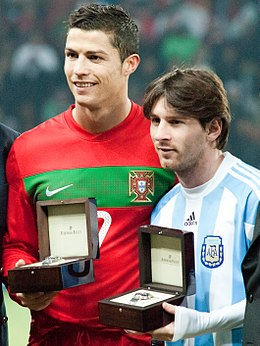

## 2.Nguồn dữ liệu

Dữ liệu được sử dụng đã được đăng lên diễn đàn về Khoa Học Dữ liệu Kaggle, và các số liệu, thông tin khác từ Wikipedia

## 3. Mục tiêu phân tích

### 3.1 Nội dung phân tích

1. Tiền xử lý và làm sạch dữ liệu
2. Thống kê số bàn ghi bởi 2 cầu thủ

### 3.2 Các kỹ năng phân tích dữ liệu được sử dụng

### 3.3 Các FameWorks và thư viện sử dụng

1. Python
2. Pandas
3. Numpy
4. Matplotlib
5. Plotly express
6. Plotly graph
7. Seaborn

## 4. Đi vào phân tích

### 1. Tiền xử lý và làm sạch dữ liệu

In [4]:
# Tạo môi trường làm việc

In [5]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Tải dữ liệu dạng CSV lên
df = pd.read_csv("cristiano_vs_messi.csv")

In [9]:
# xem tổng quan dữ liệu
df.head(10)

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13',NaN,NaN
5,ronaldo,Premier League,11,11/1/2003,H,Portsmouth,RW,80',Right-footed shot,NaN
6,ronaldo,FA Cup,Fifth Round,2/14/2004,H,Man City,RW,74',Tap-in,Ryan Giggs
7,ronaldo,Premier League,29,3/20/2004,H,Spurs,NaN,89',Right-footed shot,NaN
8,ronaldo,Premier League,32,4/10/2004,A,Birmingham,NaN,60',Header,Ryan Giggs
9,ronaldo,Premier League,38,5/15/2004,A,Aston Villa,NaN,4',Right-footed shot,NaN


In [10]:
# Xem các dạng dữ liệu của các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      846 non-null    object
 2   round     846 non-null    object
 3   date      846 non-null    object
 4   venue     846 non-null    object
 5   opp       846 non-null    object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [11]:
# Kiểm tra giá trị NULL
df.isnull()

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...
1295,False,True,True,True,True,True,True,False,False,False
1296,False,False,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False,False,True


In [13]:
# Xem tổng số giá trị bull của các cột
df.isnull().count()

player      1300
comp        1300
round       1300
date        1300
venue       1300
opp         1300
pos         1300
min         1300
type        1300
assisted    1300
dtype: int64

In [14]:
df.shape

(1300, 10)

In [15]:
df.columns

Index(['player', 'comp', 'round', 'date', 'venue', 'opp', 'pos', 'min', 'type',
       'assisted'],
      dtype='object')

In [16]:
# Xử lý giá trị NULL
df['comp']=df['comp'].ffill()
df['date']=df['date'].ffill()
df['round']=df['round'].ffill()
df['venue']=df['venue'].ffill()
df['opp']=df['opp'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      1300 non-null   object
 2   round     1300 non-null   object
 3   date      1300 non-null   object
 4   venue     1300 non-null   object
 5   opp       1300 non-null   object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [17]:
# kiểm tra giá trị NULL
df.isnull()

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...
1295,False,False,False,False,False,False,True,False,False,False
1296,False,False,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False,False,True


In [18]:
df.head(30)

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13',NaN,NaN
5,ronaldo,Premier League,11,11/1/2003,H,Portsmouth,RW,80',Right-footed shot,NaN
6,ronaldo,FA Cup,Fifth Round,2/14/2004,H,Man City,RW,74',Tap-in,Ryan Giggs
7,ronaldo,Premier League,29,3/20/2004,H,Spurs,NaN,89',Right-footed shot,NaN
8,ronaldo,Premier League,32,4/10/2004,A,Birmingham,NaN,60',Header,Ryan Giggs
9,ronaldo,Premier League,38,5/15/2004,A,Aston Villa,NaN,4',Right-footed shot,NaN


In [19]:
# Xử lý thời gian quy đổi theo phút
df['min']=df['min'].apply(lambda x:x.replace("'",''))
df['min']=df['min'].apply(lambda x:x.replace("+",''))
df['min'].unique()

array(['34', '90', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '451', '21', '76', '63', '12', '68',
       '14', '38', '45', '59', '23', '19', '73', '82', '10', '39', '84',
       '85', '47', '50', '77', '49', '28', '5', '62', '51', '41', '35',
       '903', '22', '81', '48', '70', '902', '69', '56', '79', '16', '53',
       '3', '24', '32', '26', '25', '30', '43', '65', '11', '6', '57',
       '61', '17', '27', '1', '75', '2', '64', '71', '18', '78', '29',
       '36', '15', '55', '86', '901', '72', '20', '42', '103', '46', '52',
       '904', '37', '66', '906', '31', '40', '120', '83', '7', '33', '97',
       '104', '105', '109', '907', '457', '110', '452', '454'],
      dtype=object)

In [20]:
# kiểm tra các giá trị ngoại biên
df ['min'] = df['min'].apply(lambda x:x.replace("'",' '))
df ['min'] = df['min'].apply(lambda x:x.replace("+",' '))
df['min'].unique()

array(['34', '90', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '451', '21', '76', '63', '12', '68',
       '14', '38', '45', '59', '23', '19', '73', '82', '10', '39', '84',
       '85', '47', '50', '77', '49', '28', '5', '62', '51', '41', '35',
       '903', '22', '81', '48', '70', '902', '69', '56', '79', '16', '53',
       '3', '24', '32', '26', '25', '30', '43', '65', '11', '6', '57',
       '61', '17', '27', '1', '75', '2', '64', '71', '18', '78', '29',
       '36', '15', '55', '86', '901', '72', '20', '42', '103', '46', '52',
       '904', '37', '66', '906', '31', '40', '120', '83', '7', '33', '97',
       '104', '105', '109', '907', '457', '110', '452', '454'],
      dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      1300 non-null   object
 2   round     1300 non-null   object
 3   date      1300 non-null   object
 4   venue     1300 non-null   object
 5   opp       1300 non-null   object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [22]:
# Chuyển đổi dạng dữ liệu sang dạng số
df['min']=pd.to_numeric(df['min'])

In [27]:
# Phân chia thời gian trận đấu theo hiệp
df['time_class'] = df['min'].apply(lambda x: 'firts_half' if x <= 45 else ( 'second_half' if 45<x<= 90 else 'extra_time'))

In [28]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,time_class
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34,NaN,NaN,firts_half
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90,NaN,NaN,second_half
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88,NaN,Carlos Martins,second_half
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67,Left-footed shot,César Prates,second_half
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13,NaN,NaN,firts_half


In [23]:
# Điền 0 vào các giá trị rỗng ở cột Assisted
df['assist']=df['assisted'].fillna(0)

In [24]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,assist
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34,NaN,NaN,0
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90,NaN,NaN,0
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88,NaN,Carlos Martins,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67,Left-footed shot,César Prates,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13,NaN,NaN,0


In [25]:
# Phân chia cách ghi bàn
df ['solo'] = df['assist'].apply( lambda x: 'solo' if x==0 else 'assisted')

In [26]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,assist,solo
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34,NaN,NaN,0,solo
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90,NaN,NaN,0,solo
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88,NaN,Carlos Martins,Carlos Martins,assisted
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67,Left-footed shot,César Prates,César Prates,assisted
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13,NaN,NaN,0,solo


In [27]:
df['solo'].value_counts()

assisted    874
solo        426
Name: solo, dtype: int64

In [28]:
# Chuyển thời gian ghi bàn về dạng date
from datetime import date
df ['date'] = pd.to_datetime (df['date'])

In [29]:
# Thêm cột để xử lý chuyên sâu về thời gian
L = ['year','month','day','dayofweek','dayofyear','weekofyear','quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

<ipython-input-29-e030e3ccc12d>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [30]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,assist,solo,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,RW,34,NaN,NaN,0,solo,2002,10,7,0,280,41,4
1,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,NaN,90,NaN,NaN,0,solo,2002,10,7,0,280,41,4
2,ronaldo,Liga NOS,8,2002-10-26,A,Boavista,NaN,88,NaN,Carlos Martins,Carlos Martins,assisted,2002,10,26,5,299,43,4
3,ronaldo,Taça de Portugal Placard,Fourth Round,2002-11-24,H,Estarreja,NaN,67,Left-footed shot,César Prates,César Prates,assisted,2002,11,24,6,328,47,4
4,ronaldo,Taça de Portugal Placard,Fifth Round,2002-12-18,H,Oliv. Hospital,NaN,13,NaN,NaN,0,solo,2002,12,18,2,352,51,4


In [31]:
# Chuyển kiểu dữ liệu dạng số
df['dayofweek'] = pd.to_numeric (df['dayofweek'])

In [32]:
df['dayofweek'] = df['dayofweek'].apply(lambda x: x+1)
df['dayofweek'].unique()
df['goal'] = df['goal'] =1

In [33]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,assist,solo,year,month,day,dayofweek,dayofyear,weekofyear,quarter,goal
0,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,RW,34,NaN,NaN,0,solo,2002,10,7,1,280,41,4,1
1,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,NaN,90,NaN,NaN,0,solo,2002,10,7,1,280,41,4,1
2,ronaldo,Liga NOS,8,2002-10-26,A,Boavista,NaN,88,NaN,Carlos Martins,Carlos Martins,assisted,2002,10,26,6,299,43,4,1
3,ronaldo,Taça de Portugal Placard,Fourth Round,2002-11-24,H,Estarreja,NaN,67,Left-footed shot,César Prates,César Prates,assisted,2002,11,24,7,328,47,4,1
4,ronaldo,Taça de Portugal Placard,Fifth Round,2002-12-18,H,Oliv. Hospital,NaN,13,NaN,NaN,0,solo,2002,12,18,3,352,51,4,1


### 2. Thống kê số bàn ghi bởi 2 cầu thủ

#### 2.1 Số lần ghi bàn solo/assisted

In [62]:
df['player'].value_counts()

ronaldo    656
messi      644
Name: player, dtype: int64

In [34]:
# Gom các giá trị theo 2 kiểu ghi bàn: Phối hợp (assisted) hoặc Solo

In [35]:
df_ronaldo=df.loc[df['player']=='ronaldo']
df_messi=df.loc[df['player']=='messi']

In [36]:
ronaldo_solo=df_ronaldo[df_ronaldo['solo']=='solo'] 
ronaldo_assisted=df_ronaldo[df_ronaldo['solo']=='assisted'] 

In [37]:
messi_solo=df_messi[df_messi['solo']=='solo'] 
messi_assisted=df_messi[df_messi['solo']=='assisted'] 

In [38]:
slices = [len(ronaldo_solo), len(ronaldo_assisted)]
labels = ['solo','assisted']

In [39]:
slices1 = [len(messi_solo), len(messi_assisted)]
labels1 = ['solo','assisted']

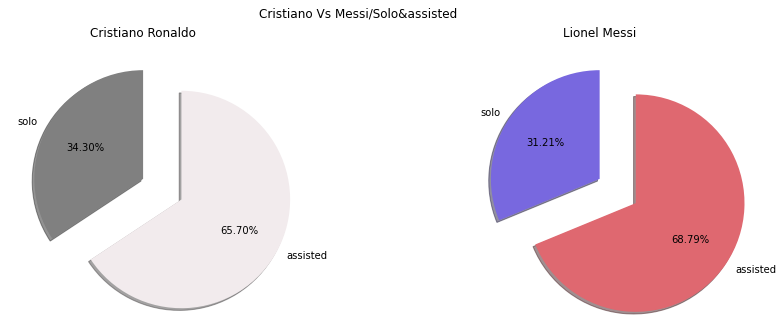

In [40]:
fig, axes = plt.subplots(1,2, figsize =(15,5), sharey= False)
fig.suptitle('Cristiano Vs Messi/Solo&assisted')

axes[0].pie(slices, labels = labels, startangle = 90, shadow =1, explode = (0, 0.4),
            autopct = '%1.2f%%', colors = ['#808080','#F2EBED'])
axes[0].set_title('Cristiano Ronaldo');

axes[1].pie(slices1, labels = labels1, startangle=90, shadow =1, explode =(0, 0.4), 
            autopct ='%1.2f%%', colors = ['#7868DF','#DF6870']);
axes[1].set_title('Lionel Messi');

#### 2.2 Số bàn thắng ghi theo ngày của 2 cầu thủ

In [43]:
# Gom số bàn thắng theo ngày và sắp xếp
r_goal=pd.DataFrame(df_ronaldo['date'].value_counts().sort_values(ascending=False))

In [44]:
r_goal

,date
2015-09-12,5
2015-04-05,5
2010-10-23,4
2014-09-23,4
2011-05-07,4
...,...
2015-04-08,1
2018-11-11,1
2015-01-15,1
2007-11-07,1


In [51]:
# Phân loại số bàn thắng theo nhóm của CR7
r_goal['nick'] = r_goal['date'].apply(lambda x: 'hatrick' if x ==3 else ('haul' if x ==4 else ('glut' if x ==5 else ('brace' if x ==2 else 'single goal'))))

In [52]:
r_goal.head()

,date,nick
2012-03-07,5,glut
2020-02-22,4,haul
2017-09-19,4,haul
2013-01-27,4,haul
2012-05-05,4,haul


In [54]:
# Phân loại số bàn thắng theo nhóm của M10
m_goal=pd.DataFrame(df_messi['date'].value_counts().sort_values(ascending=False))
m_goal['nick']=m_goal['date'].apply(lambda x:'hatrick' if x==3 else ('haul' if x==4 else ('glut' if x==5 else ('brace' if x ==2 else 'single goal'))))

In [55]:
r_goal['player']='ronaldo'
m_goal['player']='messi'

In [95]:
r_goal

,date,nick,player
2015-09-12,5,glut,ronaldo
2015-04-05,5,glut,ronaldo
2010-10-23,4,haul,ronaldo
2014-09-23,4,haul,ronaldo
2011-05-07,4,haul,ronaldo
...,...,...,...
2015-04-08,1,single goal,ronaldo
2018-11-11,1,single goal,ronaldo
2015-01-15,1,single goal,ronaldo
2007-11-07,1,single goal,ronaldo


In [56]:
# Gom 2 bảng của 2 cầu thủ với nhau
all_goal = r_goal.append(m_goal).reset_index()

In [57]:
all_goal

,index,date,nick,player
0,2012-03-07,5,glut,ronaldo
1,2020-02-22,4,haul,ronaldo
2,2017-09-19,4,haul,ronaldo
3,2013-01-27,4,haul,ronaldo
4,2012-05-05,4,haul,ronaldo
...,...,...,...,...
819,2015-02-01,1,single goal,messi
820,2010-05-08,1,single goal,messi
821,2006-09-09,1,single goal,messi
822,2007-11-24,1,single goal,messi


In [98]:
all_goal.rename(columns={'date':'goal_count'},inplace=True)

In [58]:
all_goal

,index,date,nick,player
0,2012-03-07,5,glut,ronaldo
1,2020-02-22,4,haul,ronaldo
2,2017-09-19,4,haul,ronaldo
3,2013-01-27,4,haul,ronaldo
4,2012-05-05,4,haul,ronaldo
...,...,...,...,...
819,2015-02-01,1,single goal,messi
820,2010-05-08,1,single goal,messi
821,2006-09-09,1,single goal,messi
822,2007-11-24,1,single goal,messi


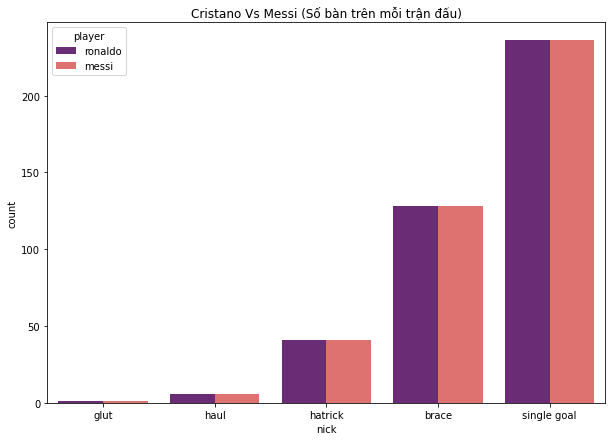

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(data=all_goal,x='nick',hue='player',palette='magma').set_title('Cristano Vs Messi (Số bàn trên mỗi trận đấu)');

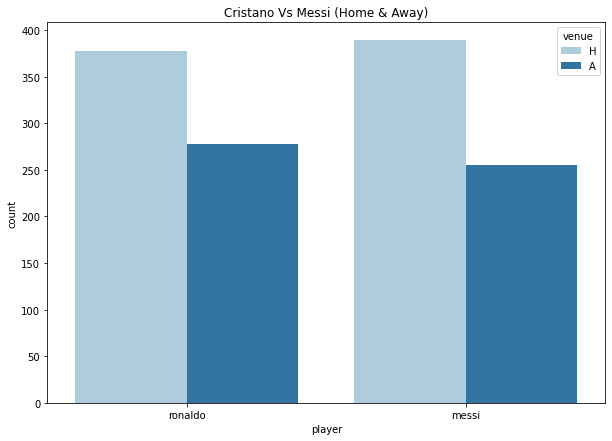

In [61]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='player',hue='venue',palette="Paired").set_title('Cristano Vs Messi (Home & Away)');

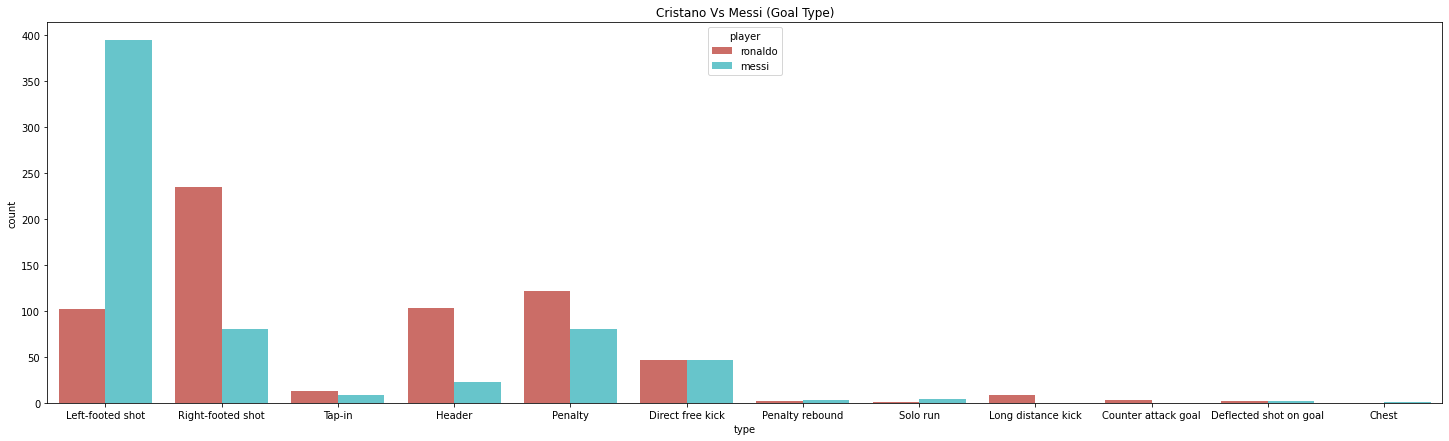

In [62]:
plt.figure(figsize=(25,7))
sns.countplot(data=df,x='type',hue='player',palette="hls").set_title('Cristano Vs Messi (Goal Type)');

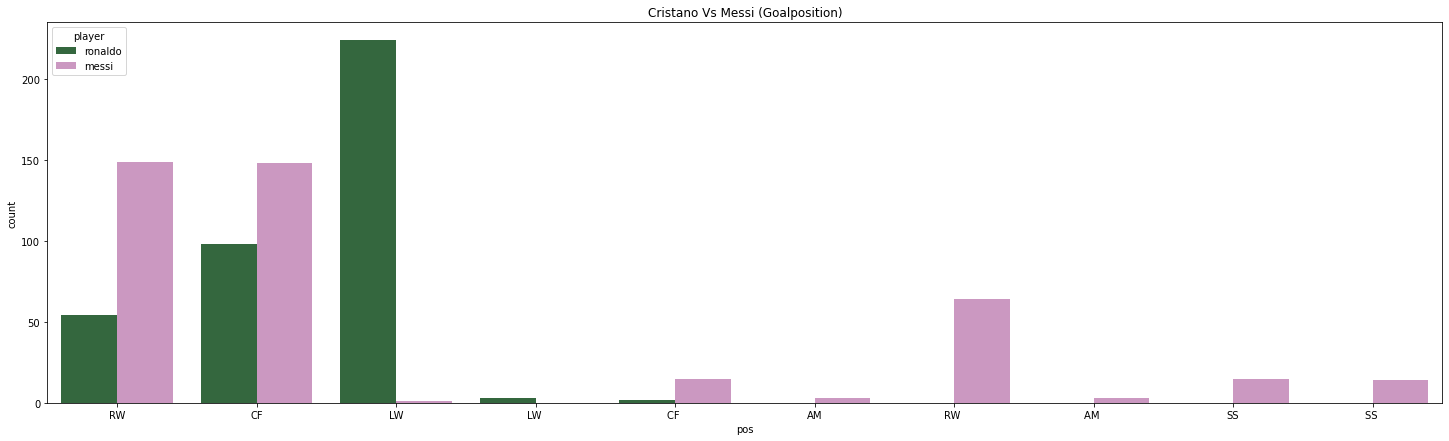

In [63]:
plt.figure(figsize=(25,7))
sns.countplot(data=df,x='pos',hue='player',palette="cubehelix").set_title('Cristano Vs Messi (Goalposition)');

#### 3. Đồng đội ưa thích của 2 cầu thủ

In [64]:
r_assist = df_ronaldo['assisted'].value_counts()
r_assist = r_assist[:10]
# Top 10 cầu thủ được CR7 phối hợp cùng khi ghi bàn

In [65]:
r_assist 

Karim Benzema      44
Gareth Bale        29
Mesut Özil         26
Marcelo            23
Ángel Di María     22
Ryan Giggs         19
Gonzalo Higuaín    16
Isco               16
Luka Modric        14
Daniel Carvajal    12
Name: assisted, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



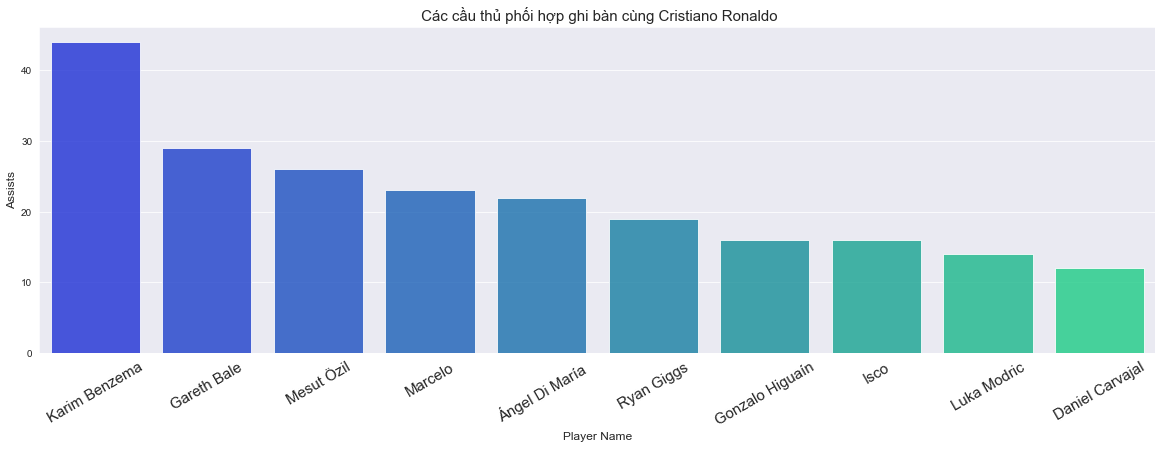

In [66]:
sns.set_style ("darkgrid")
plt.figure(figsize = (20,6))
r_assist_vis = sns.barplot(r_assist.index, r_assist.values, alpha = 0.8, palette = 'winter');
plt.title (' Các cầu thủ phối hợp ghi bàn cùng Cristiano Ronaldo', fontsize = 15);
plt.ylabel ('Assists', fontsize =12);
plt.xlabel ('Player Name', fontsize =12);
r_assist_vis.set_xticklabels ( rotation = 30, labels = r_assist.index, fontsize = 15);
plt.show();

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



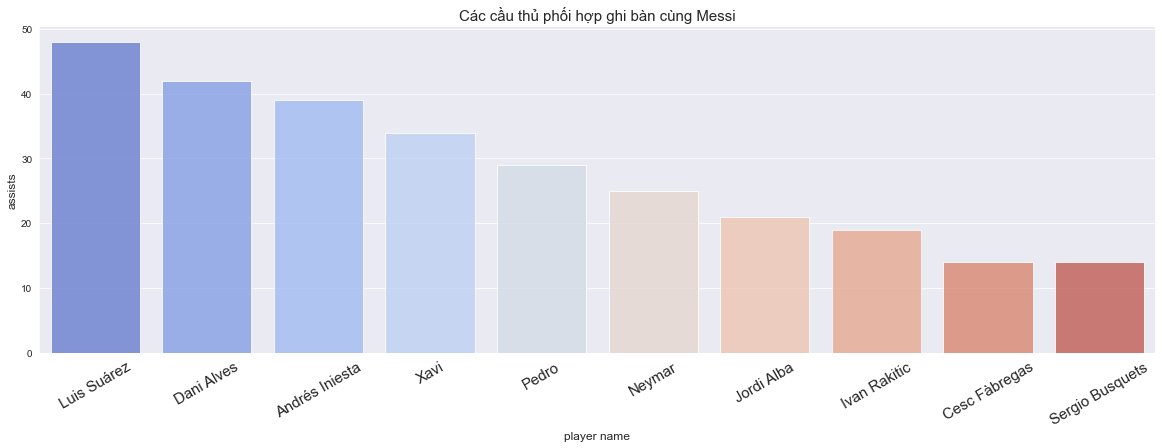

In [67]:
m_assist =df_messi['assisted'].value_counts()
m_assist = m_assist[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6));
m_assist_vis = sns.barplot(m_assist.index, m_assist.values, alpha=0.8,palette="coolwarm");
plt.title('Các cầu thủ phối hợp ghi bàn cùng Messi',fontsize=15);
plt.ylabel('assists', fontsize=12);
plt.xlabel('player name', fontsize=12);
m_assist_vis.set_xticklabels(rotation=30,labels=m_assist.index,fontsize=15);
plt.show();

#### 4. Đối thủ thường xuyên của 2 cầu thủ

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



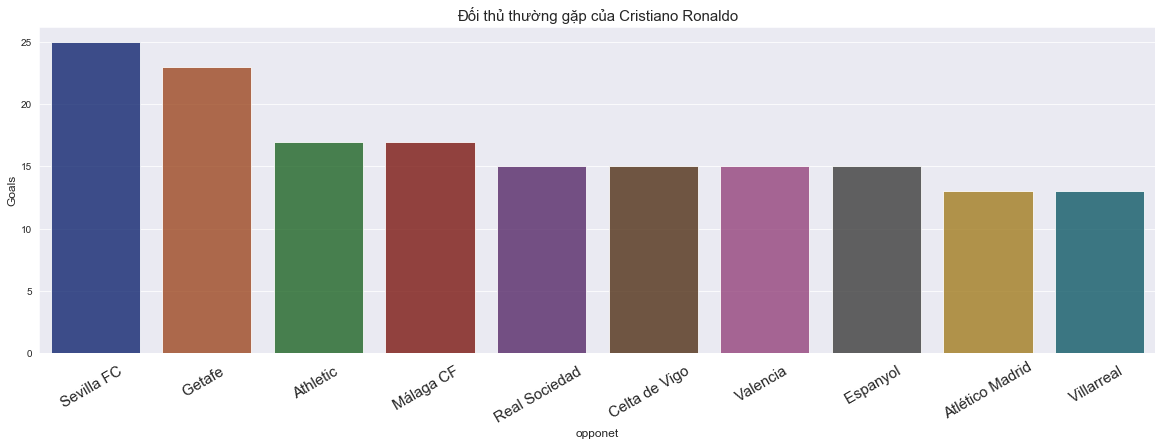

In [68]:
r_op =df_ronaldo['opp'].value_counts()
r_op = r_op[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6));
r_op_vis = sns.barplot(r_op.index, r_op.values, alpha=0.8,palette="dark");
plt.title('Đối thủ thường gặp của Cristiano Ronaldo',fontsize=15);
plt.ylabel('Goals', fontsize=12);
plt.xlabel('opponet', fontsize=12);
r_op_vis.set_xticklabels(rotation=30,labels=r_op.index,fontsize=15);
plt.show();

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



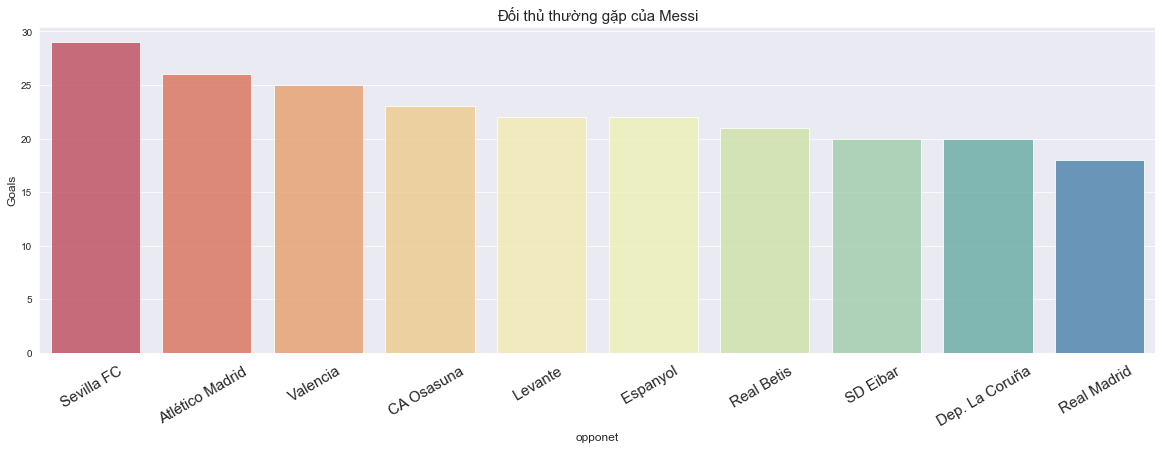

In [69]:
m_op =df_messi['opp'].value_counts()
m_op = m_op[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6));
m_op_vis = sns.barplot(m_op.index, m_op.values, alpha=0.8,palette="Spectral");
plt.title('Đối thủ thường gặp của Messi',fontsize=15);
plt.ylabel('Goals', fontsize=12);
plt.xlabel('opponet', fontsize=12);
m_op_vis.set_xticklabels(rotation=30,labels=m_op.index,fontsize=15);
plt.show();

#### 5. Số lần dứt điểm ghi bàn theo thời gian trận đấu

In [70]:
# Số lần dứt điểm ghi bàn theo thời gian trận đấu của CR7
min_ronaldo1=df_ronaldo.groupby(['min']).size().to_frame('count').reset_index()

In [71]:
min_ronaldo1

,min,count
0,1,1
1,2,6
2,3,8
3,4,4
4,5,3
...,...,...
99,902,4
100,903,2
101,904,2
102,906,2


In [72]:
min_ronaldo=min_ronaldo1.sort_values(by='count', ascending=False)[:10]

In [73]:
min_ronaldo

,min,count
89,90,18
22,23,14
44,45,14
88,89,13
75,76,13
69,70,13
81,82,12
25,26,11
67,68,10
58,59,10


In [74]:
min_ronaldo=min_ronaldo.reset_index()

In [75]:
min_ronaldo

,index,min,count
0,89,90,18
1,22,23,14
2,44,45,14
3,88,89,13
4,75,76,13
5,69,70,13
6,81,82,12
7,25,26,11
8,67,68,10
9,58,59,10


In [76]:
min_ronaldo=min_ronaldo.rename(columns={'min':('Ronald_min')})
min_ronaldo=min_ronaldo.drop(columns=['index'])

In [77]:
min_ronaldo

,Ronald_min,count
0,90,18
1,23,14
2,45,14
3,89,13
4,76,13
5,70,13
6,82,12
7,26,11
8,68,10
9,59,10


In [78]:
#Số lần dứt điểm ghi bàn theo thời gian trận đấu của Messi
min_messi=df_messi.groupby(['min']).size().to_frame('count').reset_index()
min_messi=min_messi.sort_values(by='count', ascending=False)[:10]
min_messi=min_messi.reset_index()
min_messi=min_messi.rename(columns={'min':('messi_min')})
min_messi=min_messi.drop(columns='index')

In [79]:
min_messi

,messi_min,count
0,55,13
1,87,12
2,78,12
3,45,12
4,63,11
5,82,11
6,86,11
7,90,11
8,75,11
9,16,10


In [80]:
min_cr7 = df_ronaldo[df_ronaldo['min']<90]
min_values = min_cr7['min'].values

In [81]:
min_values

# hàm values sẽ đưa ra mỗi giá trị (min_cr7 đưa ra cả bảng)

array([34, 88, 67, 13, 80, 74, 89, 60,  4, 44, 87,  9,  8, 54, 58, 58, 21,
       76, 63, 12, 68, 14, 87, 38, 45, 59, 74, 23, 19, 73, 82, 10, 39, 84,
       58, 85, 47, 50, 58, 77, 34, 12, 45, 88, 68, 76, 44, 49, 28,  5, 34,
       62, 51, 59, 76, 41, 68, 82, 88, 34, 35, 10, 58, 22, 87, 45, 14, 81,
       48, 70, 88, 69, 88, 10, 12, 45, 56, 41, 76,  8, 19, 79, 16, 39,  9,
       53,  3, 24, 32, 26, 25, 59, 69, 14, 30,  3, 43,  3, 88, 89, 65, 73,
       43, 68, 60, 49, 22, 11, 80,  6, 57, 68, 11, 61, 17, 34, 27, 89,  1,
       75,  2, 58, 64, 84,  5, 80, 50, 35, 39, 69, 71, 18, 78, 59,  6, 29,
       13, 36, 23, 26, 77, 25, 89, 26, 56, 71, 21, 28,  4, 89, 45, 50, 13,
       15, 26, 47, 55, 82, 86, 76, 30, 62, 70, 81, 72, 86, 49, 43, 44, 71,
       73, 11, 57, 10, 45, 79, 60, 22, 20, 42, 50, 67, 76, 87, 70, 50, 82,
       30, 64, 70, 76, 23, 57, 22,  4, 76, 20, 23, 70, 86, 59, 39, 51, 84,
       25, 24, 28, 38, 25, 69, 23, 55, 58, 79, 24, 82, 65, 74, 10, 41, 86,
       89, 11, 46, 67, 68

In [82]:
min_messi=df_messi[df_messi['min']<90]
min_values_messi=min_messi['min'].values

In [83]:
min_values_messi

array([34, 51, 50, 82, 75, 83, 42, 84, 59, 36, 89, 80, 11, 28, 86, 45, 29,
       45, 39, 80, 43, 57, 34, 51, 82, 72, 79,  5, 10, 50, 66, 19, 80, 41,
       81, 58, 18, 79, 44,  5, 70, 85, 89, 87,  8,  4, 19, 61, 86, 51, 49,
       78, 89, 11, 57, 79, 84, 21, 49, 76, 65, 81, 30, 81, 31, 40, 26,  9,
       38, 18, 23, 35, 75, 55, 70, 50, 68, 78, 15, 23, 63, 25, 80, 86, 64,
       26, 80, 86, 55, 36, 45, 75, 85, 54,  7, 84, 42, 66, 56, 80, 82, 13,
       56,  4, 65, 78, 67, 21, 37, 42, 88, 32, 18, 87, 16,  5, 61, 74, 25,
       43,  3, 22, 45, 12, 20, 18, 41, 65,  4, 63, 31, 23, 67, 58, 83, 16,
       36, 67, 63, 64, 82, 46, 86, 51, 44, 63, 73, 37, 33,  9, 15, 87, 89,
       16, 28, 78, 78, 38, 77, 49, 72, 52, 42, 53, 87, 76, 87, 54, 45, 44,
       88, 39, 51, 74,  5, 41, 79, 26, 78, 38, 56, 11, 69, 13, 21, 30, 24,
       43, 31, 49, 55, 17, 82, 71, 12, 86, 32, 51, 77, 72, 88, 21, 27, 75,
       84, 79, 25, 42, 50, 58, 85, 28, 55, 25, 16, 66, 85, 25, 57, 11, 42,
       39, 86, 44, 64, 73

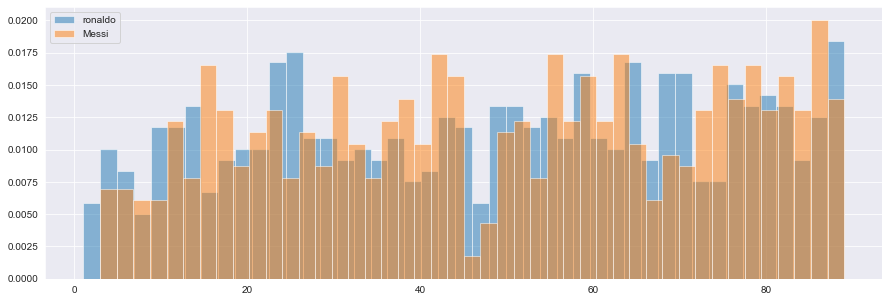

In [85]:
# Thống kê số lần ghi bàn theo thời gian trận đấu của cả 2
plt.figure (figsize = (15,5))
plt.hist (min_values, histtype = 'bar', bins = 45, density = True, label ='ronaldo', alpha =0.5)
plt.hist(min_values_messi,bins=45,histtype='bar',density=True,label='Messi',alpha=0.5);
plt.legend(loc='upper left');

Biểu đồ trên thấy rằng Ronaldo có phong độ duy trì hơn so với Messi từ đầu đến cuối trận đấu

Text(0.5, 0, 'Home Factor')

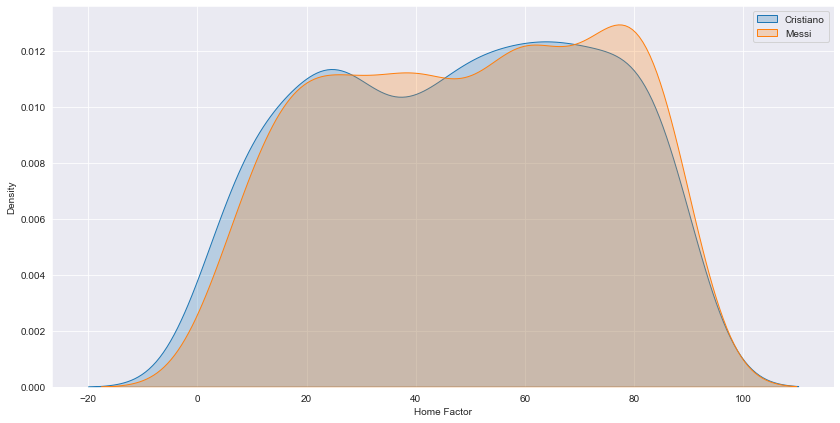

In [86]:
# Biểu đồ dưới dạng đường
plt.figure(figsize =(14,7))
sns.kdeplot (min_values, shade = True)
sns.kdeplot (min_values_messi, shade = True)
plt.legend(['Cristiano','Messi'])
plt.xlabel('Home Factor')

## 5. Tổng kết

Cristiano Ronaldo và Messi Họ là hai trong số 28 cầu thủ trong lịch sử thể thao ghi được hơn 500 bàn thắng trong sự nghiệp, hiện xếp thứ 2 (Ronaldo) và thứ 8 (Messi), với cả hai đều ghi được hơn 700 bàn thắng trong sự nghiệp của họ cho câu lạc bộ và quốc gia: Ronaldo có tổng cộng 807 bàn và Messi có 760 bàn. Hơn nữa, họ là những cầu thủ kiến tạo hàng đầu mọi thời đại, với Messi hiện đang dẫn đầu với 358 kiến tạo và Ronaldo đang đứng ở vị trí thứ 2 với 306 kiến tạo.